In [1]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

# **Definicion de modelos de agentes**

In [149]:
class Car(ap.Agent):
    
    def setup(self):
        self.grid = self.model.grid
        self.random = self.model.random
        self.orientation = self.random.randint(0, 3)
        self.speed = 0
        self.moving = 0 # 0: none, 1: moving, 2: stopped
        self.currentPosition = ()

    '''    
    def moveDown(self):
        self.y -= 1
        if self.y < 0:
            self.y = self.grid.height-1
    
    def stop(self):
        self.x = self.x
        self.y = self.y
    
    def turnLeft(self):
        self.orientation -= 1
        if self.orientation < 0:
            self.orientation = 3
    
    def turnRight(self):
        self.orientation += 1
        if self.orientation > 3:
            self.orientation = 0

    def accelerate(self):
        self.speed += 1
        if self.speed > 10:
            self.speed = 10

    def decelerate(self):
        self.speed -= 1
        if self.speed < 0:
            self.speed = 0

    '''
    def carsToRight(self):
        #FALTA checar si hay un carro a la derecha
        #print(self.grid.get_cell_list_contents([(self.currentPosition[0],self.currentPosition[1]+1)]))
        


    def moveRight(self):
        #FALTA check if there is a neighbor to the right
        self.grid.move_to(self,(self.currentPosition[0],self.currentPosition[1]+1))
        self.currentPosition = self.grid.positions[self]

    def moveLeft(self):
        #FALTA check if there is a neighbor to the left
        self.grid.move_to(self,(self.currentPosition[0],self.currentPosition[1]-1))
        self.currentPosition = self.grid.positions[self]

    def moveUp(self):
        #FALTA check if there is a neighbor to the left
        self.grid.move_to(self,(self.currentPosition[0]-1,self.currentPosition[1]))
        self.currentPosition = self.grid.positions[self]

    def moveDown(self):
        #FALTA check if there is a neighbor to the left
        self.grid.move_to(self,(self.currentPosition[0]+1,self.currentPosition[1]))
        self.currentPosition = self.grid.positions[self]

    
    def move(self):
        #checa si no esta definida la tupla de posicion
        if not self.currentPosition:
            self.currentPosition = self.grid.positions[self]
        
        #cambia estado a en movimiento
        self.moving = 1


        #Movimientos
        #self.moveRight() #FUNCIONANDO
        #self.moveLeft() #FUNCIONANDO
        #self.moveUp() #FUNCIONANDO
        #self.moveDown() #FUNCIONANDO

        self.carsToRight()

        self.currentPosition = self.grid.positions[self]
        

In [136]:
class SuperBlockModel(ap.Model):
    def setup(self):
        s = self.p.size
        n = self.p.cars

        #Create grid and agents
        self.grid = ap.Grid(self, (s, s), track_empty=True)
        self.agents = ap.AgentList(self, n, Car)
        self.grid.add_agents(self.agents, random=True, empty=True)

    def update(self):
        self.agents.move()    
    
    def step(self):
        # Move agents
        self.agents.move()    

In [79]:
parameters = {
    'cars': 10,
    'size': 100, # Size of the grid
    'steps': 50  # Maximum number of steps
}

AttributeError: Grid (Obj 1) has no attribute 'get_cell_list_contents'.

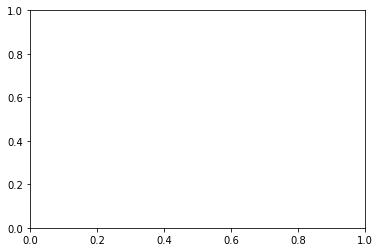

In [150]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    group_grid = model.grid.attr_grid('moving')
    color_dict = {0:'#7FC97F' ,1:'#ffff', 2:"#fe4450", None:'#343131'}
    ap.gridplot(group_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title("Modelo SuperManzanas")

fig, ax = plt.subplots()
model = SuperBlockModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())